In [61]:
import pandas as pd
import random
import gensim
from gensim.utils import simple_preprocess
from time import time

In [41]:
words_list = pd.read_csv('korean_wordlist.csv')

In [3]:
words_list

,English,Korean
0,apple,sagwa
1,apricot,salgu
2,avocado,abokado
3,banana,banana
4,blackberry,beulraek beri
...,...,...
754,uranus,cheonwangseong
755,neptune,haewangseong
756,mercury,sueun
757,jupiter,mokseong


In [77]:
wiki = pd.read_csv('wikipedia_sentences_2.csv')


In [78]:
#convert sentences into a list
sentences_list = wiki.iloc[:, 0].tolist()
print(f"totla number of sentences {len(sentences_list)}")


#from gensim library, it tokenizes (splits input into words on spaces), converts all words to lowercase, and removes words with less than 2 letters or more than 15 letters.
clean_sentences = [simple_preprocess(sentence) for sentence in sentences_list]

totla number of sentences 40543


In [79]:
# removing stop words
stop_words = [
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "aren't", "as", "at", "be", "because", "been", "before",
    "being", "below", "between", "both", "but", "by", "can't", "cannot","could", "couldn't", "did", "didn't", "do", "does", "doesn't", "doing",
    "don't", "down", "during", "each", "few", "for", "from", "further", "had","hadn't", "has", "hasn't", "have", "haven't", "having", "he", "he'd",
    "he'll", "he's", "her", "here", "here's", "hers", "herself", "him","himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if",
    "in", "into", "is", "isn't", "it", "it's", "its", "itself", "let's", "me", "more", "most", "mustn't", "my", "myself", "no", "nor", "not", "of", "off",
    "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves","out", "over", "own", "same", "shan't", "she", "she'd", "she'll", "she's",
    "should", "shouldn't", "so", "some", "such", "than", "that", "that's","the", "their", "theirs", "them", "themselves", "then", "there",
    "there's", "these", "they", "they'd", "they'll", "they're", "they've","this", "those", "through", "to", "too", "under", "until", "up", "very",
    "was", "wasn't", "we", "we'd", "we'll", "we're", "we've", "were","weren't", "what", "what's", "when", "when's", "where", "where's",
    "which", "while", "who", "who's", "whom", "why", "why's", "with","won't", "would", "wouldn't", "you", "you'd", "you'll", "you're",
    "you've", "your", "yours", "yourself", "yourselves"
]

for sentence in clean_sentences:
    sentence[:] = [word for word in sentence if word not in stop_words]




In [432]:
#testing for Lemmatization reduces words to their base form (e.g., "apples" → "apple", "berries" → "berry").
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

clean_sentences = [
    [lemmatizer.lemmatize(word) for word in simple_preprocess(sentence) if word not in stop_words]
    for sentence in sentences_list
]

In [433]:
random.seed(42)
np.random.seed(42)
#word2vec model from gensim library
model = gensim.models.Word2Vec(
    window=5,
    min_count=7,
    workers=1,
    vector_size=120,
    seed=42,
)

#bulding one-hot-encoding of our words
model.build_vocab(clean_sentences, progress_per=10)


print(f"number of words in our datasets {len(model.wv)}")


number of words in our datasets 10135


In [434]:
t = time()

#training the model
model.train(clean_sentences, total_examples=model.corpus_count, epochs=30)


print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

print("model was trained over sentences succesfully")


Time to train the model: 0.33 mins
model was trained over sentences succesfully


In [274]:
print("clementine" in model.wv)

True


In [397]:
print(model.wv.most_similar("apple", topn=10))

[('pear', 0.5755823254585266), ('cider', 0.5730190873146057), ('avocado', 0.5690622925758362), ('grape', 0.5587173700332642), ('fruit', 0.5584017038345337), ('ripen', 0.5461999773979187), ('lychee', 0.5450165867805481), ('fig', 0.5384316444396973), ('cultivar', 0.5376406908035278), ('orchard', 0.5243321061134338)]


In [398]:
print(model.wv.most_similar("compost", topn=10))

[('composted', 0.6703553795814514), ('fertilizer', 0.6344394087791443), ('aerated', 0.6225704550743103), ('wastewater', 0.6029886603355408), ('fermented', 0.5952678918838501), ('gardener', 0.5662052631378174), ('cured', 0.548099160194397), ('extract', 0.5479676723480225), ('manure', 0.5453941226005554), ('sewage', 0.541388750076294)]


In [399]:
print(model.wv.most_similar("football", topn=10))

[('rugby', 0.7365311980247498), ('soccer', 0.7191789746284485), ('basketball', 0.6692351698875427), ('handball', 0.648444652557373), ('volleyball', 0.634103536605835), ('cricket', 0.6246444582939148), ('hockey', 0.6054712533950806), ('fifa', 0.6007160544395447), ('team', 0.6004214286804199), ('confederation', 0.5977564454078674)]


In [368]:
model.wv.most_similar(positive=["apple", "fish"], negative=["cat"], topn=3)

[('grape', 0.42467212677001953),
 ('nut', 0.4096113443374634),
 ('lemon', 0.40873903036117554)]

In [444]:
round(model.wv.similarity('apple','banana'),3)

0.349

In [445]:
model.wv.__getitem__(["cat"]).shape

(1, 300)

In [260]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [411]:
 def plot_words(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 120), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=21).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-10, Y[:, 0].max()+10)
    plt.ylim(Y[:, 1].min()-10, Y[:, 1].max()+10)
            
    plt.title('10 most similar word for {} vs 10 most dissimilar'.format(word.title()))

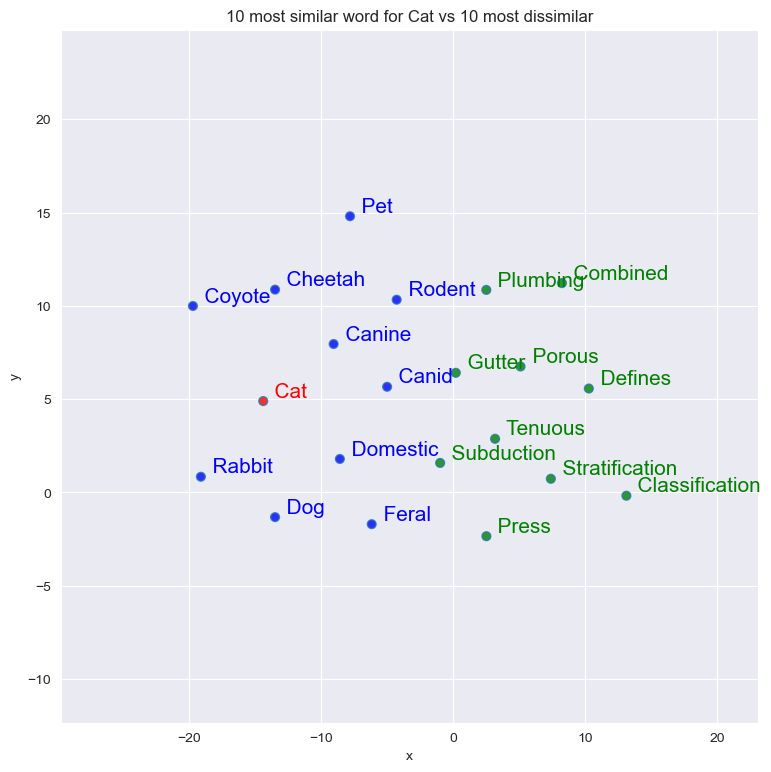

In [412]:
plot_words(model,"cat",[i[0] for i in model.wv.most_similar(negative=["cat"])])

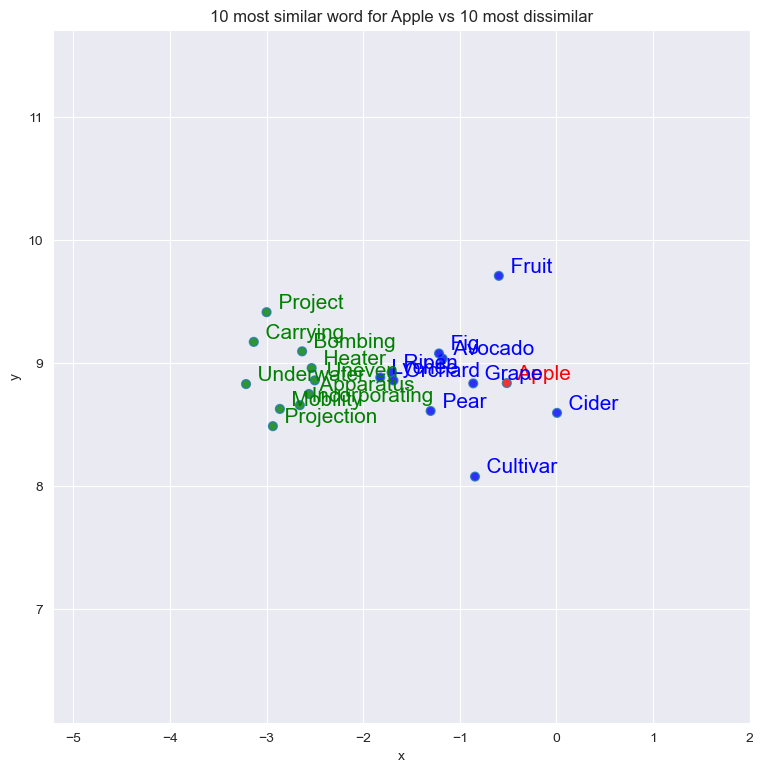

In [430]:
plot_words_100(model,"apple",[i[0] for i in model.wv.most_similar(negative=["apple"])])

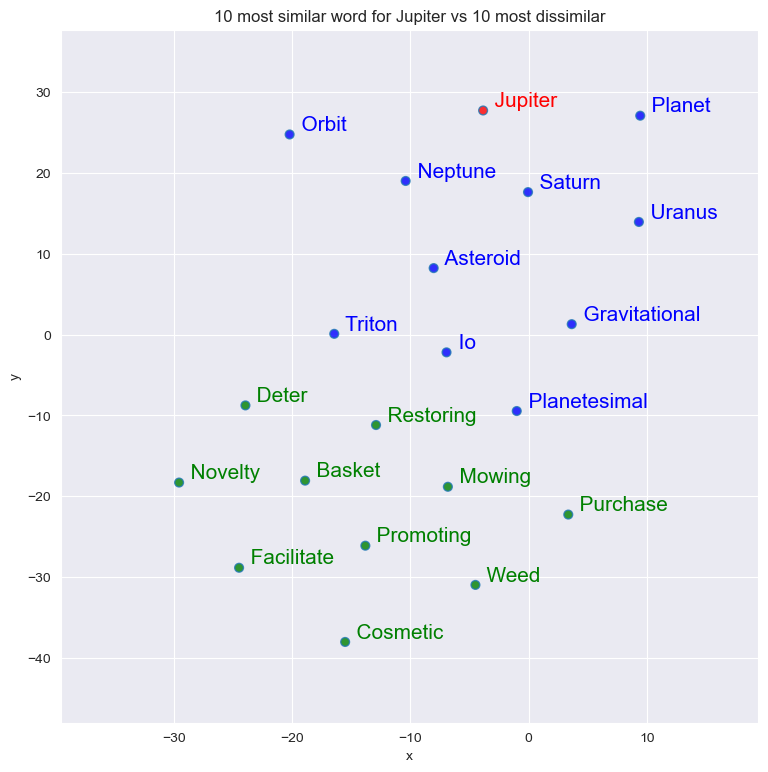

In [414]:
plot_words(model,"jupiter",[i[0] for i in model.wv.most_similar(negative=["jupiter"])])

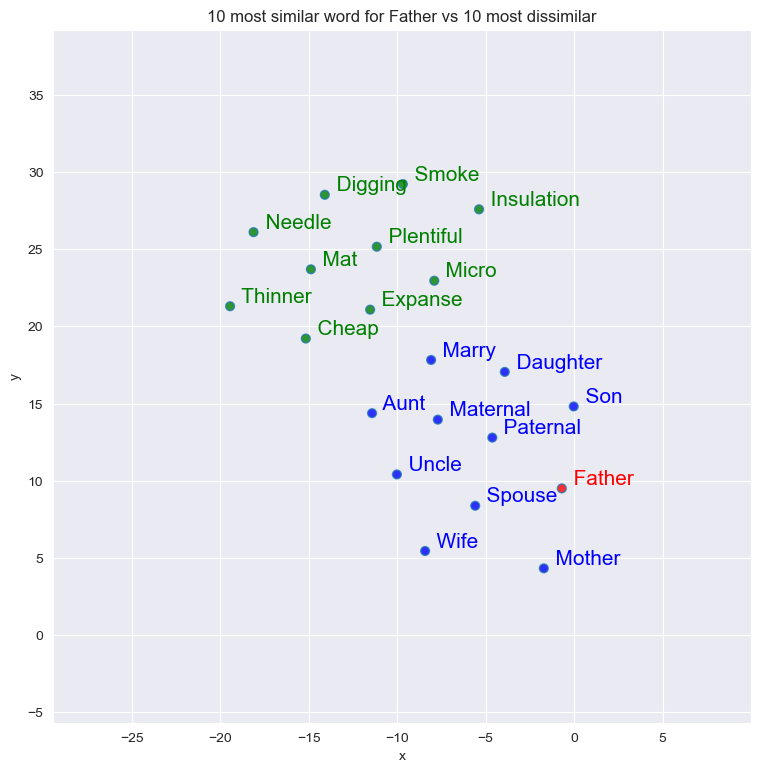

In [415]:
plot_words(model,"father",[i[0] for i in model.wv.most_similar(negative=["father"])])

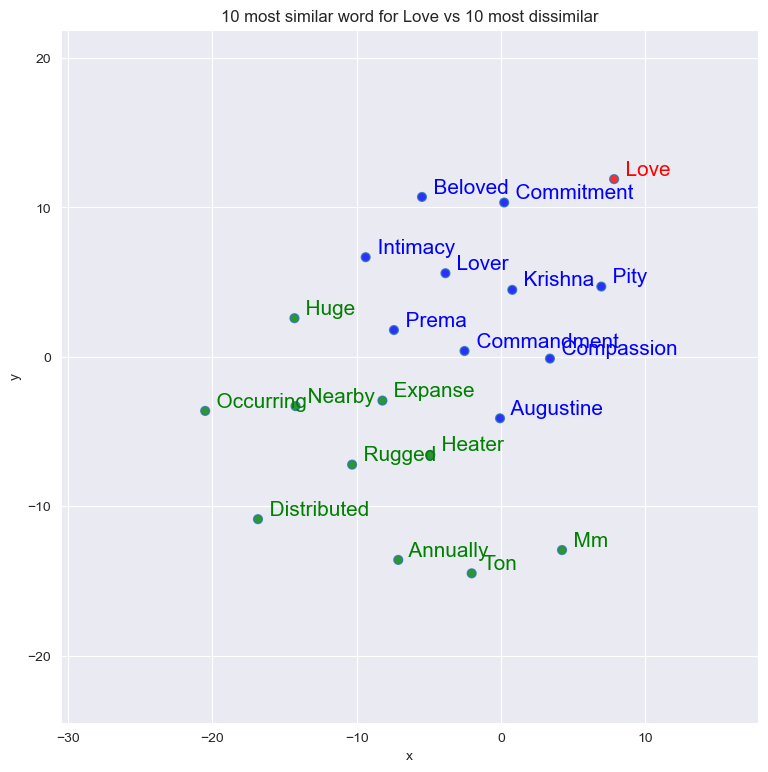

In [416]:
plot_words(model,"love",[i[0] for i in model.wv.most_similar(negative=["love"])])

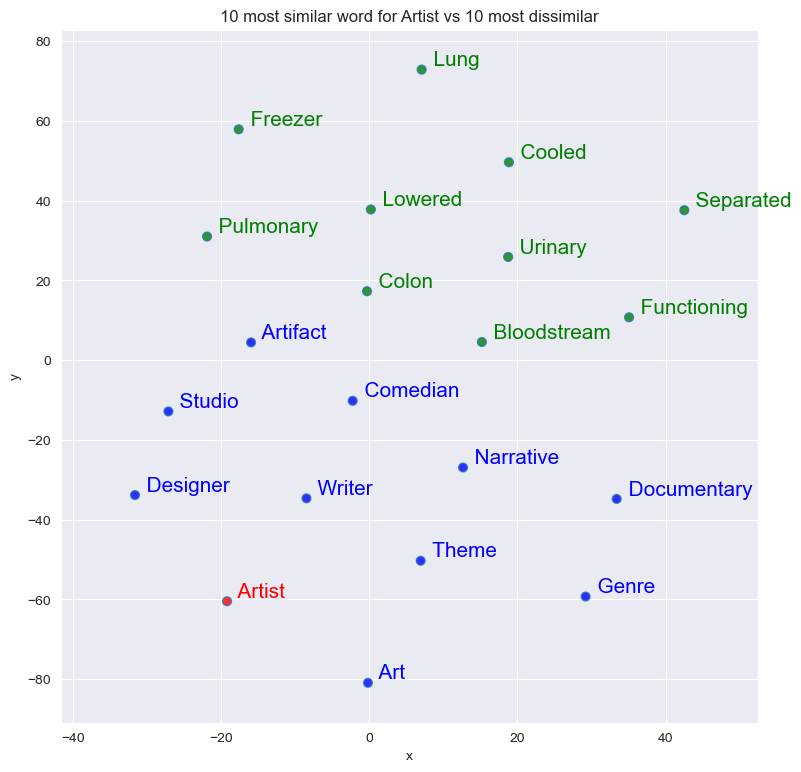

In [417]:
plot_words(model,"artist",[i[0] for i in model.wv.most_similar(negative=["artist"])])

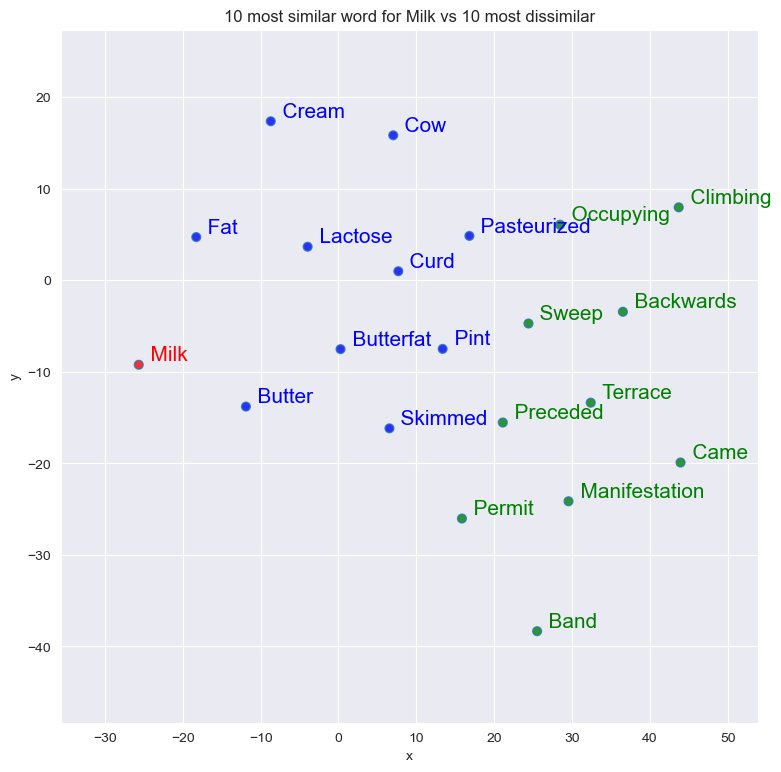

In [418]:
plot_words(model,"milk",[i[0] for i in model.wv.most_similar(negative=["milk"])])

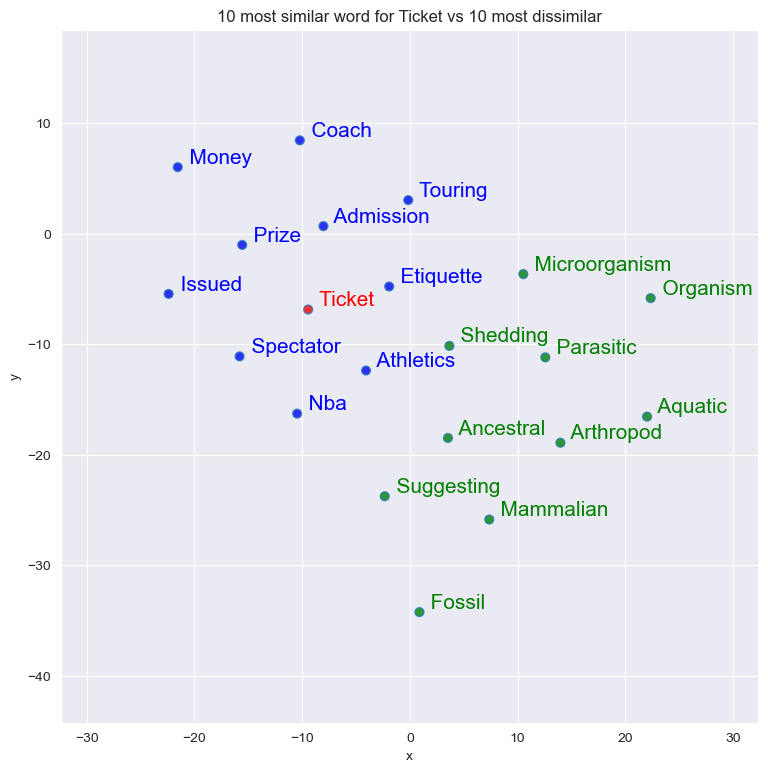

In [419]:
plot_words(model,"ticket",[i[0] for i in model.wv.most_similar(negative=["ticket"])])

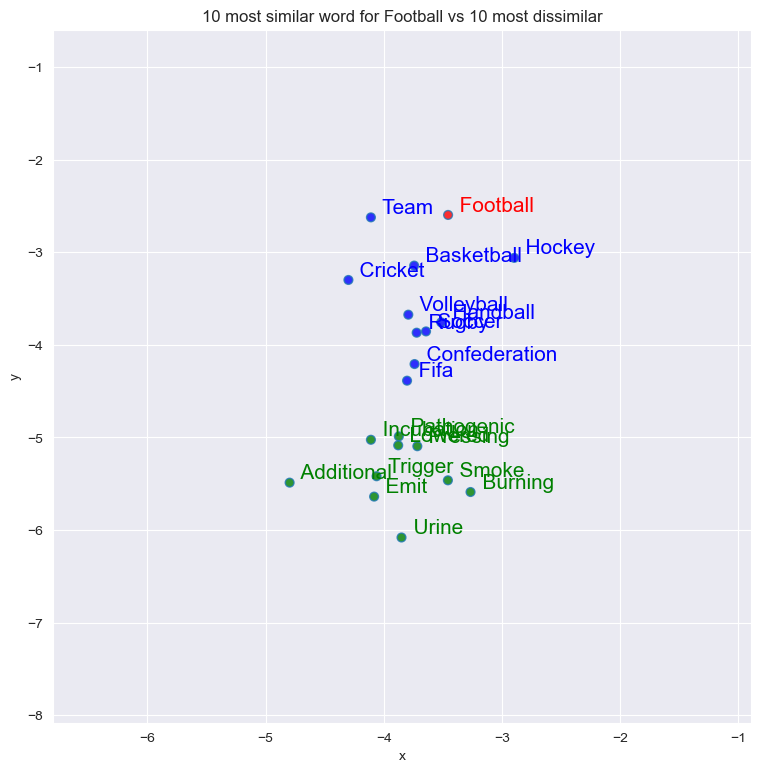

In [429]:
plot_words_100(model,"football",[i[0] for i in model.wv.most_similar(negative=["football"])])